In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizer_v2.adam import Adam
from sklearn import datasets
from sklearn.model_selection import train_test_split


class Cnn:

    def __init__(self,X_train,y_train,X_test,y_test,epochs,batch_size,learning_rate,num_classes,num_filters,filter_size,pool_size,hidden_layer_size,dropout_rate):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_classes = num_classes
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.pool_size = pool_size
        self.hidden_layer_size = hidden_layer_size
        self.dropout_rate = dropout_rate

    def build_model(self):
        self.model = Sequential()
        self.model.add(Conv2D(self.num_filters,self.filter_size,input_shape=self.X_train.shape[1:])) # input_shape = (28,28,1)
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=self.pool_size))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Flatten())
        self.model.add(Dense(self.hidden_layer_size))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(self.num_classes))
        self.model.add(Activation('softmax'))
        self.model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=self.learning_rate),metrics=['accuracy'])

    def train_model(self):
        self.history = self.model.fit(self.X_train,self.y_train,batch_size=self.batch_size,epochs=self.epochs,verbose=1,validation_data=(self.X_test,self.y_test))

    def plot_history(self):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'],loc='upper left')
        plt.show()

    def evaluate_model(self):
        scores = self.model.evaluate(self.X_test,self.y_test,verbose=1)
        print('Test loss:',scores[0])
        print('Test accuracy:',scores[1])

    def predict_model(self):
        y_pred = self.model.predict(self.X_test)
        y_pred = np.argmax(y_pred,axis=1)
        y_test = np.argmax(self.y_test,axis=1)
        print('Confusion Matrix:')
        print(confusion_matrix(y_test,y_pred))
        print('Accuracy:',accuracy_score(y_test,y_pred))


In [9]:
# Load the data
data = datasets.load_digits()
X = data.images.reshape((len(data.images),8,8,1))
y = data.target
#y = pd.get_dummies(data.target).values

In [12]:
X

array([[[[ 0.],
         [ 0.],
         [ 5.],
         ...,
         [ 1.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [13.],
         ...,
         [15.],
         [ 5.],
         [ 0.]],

        [[ 0.],
         [ 3.],
         [15.],
         ...,
         [11.],
         [ 8.],
         [ 0.]],

        ...,

        [[ 0.],
         [ 4.],
         [11.],
         ...,
         [12.],
         [ 7.],
         [ 0.]],

        [[ 0.],
         [ 2.],
         [14.],
         ...,
         [12.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 6.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 5.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 9.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 3.],
         ...,
         [ 6.],
         [

In [4]:
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

array([[[[ 0.],
         [ 0.],
         [ 5.],
         ...,
         [ 1.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [13.],
         ...,
         [15.],
         [ 5.],
         [ 0.]],

        [[ 0.],
         [ 3.],
         [15.],
         ...,
         [11.],
         [ 8.],
         [ 0.]],

        ...,

        [[ 0.],
         [ 4.],
         [11.],
         ...,
         [12.],
         [ 7.],
         [ 0.]],

        [[ 0.],
         [ 2.],
         [14.],
         ...,
         [12.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 6.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 5.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 9.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 3.],
         ...,
         [ 6.],
         [

In [7]:
X_train.shape

(1437, 8, 8, 1)

In [5]:
# Build the model
model = Cnn(X_train,y_train,X_test,y_test,epochs=10,batch_size=32,learning_rate=0.001,num_classes=10,num_filters=32,filter_size=(3,3),pool_size=(2,2),hidden_layer_size=128,dropout_rate=0.25)

In [6]:
X_train.shape[1:]

(8, 8, 1)

In [ ]:
# Train the model
model.build_model()


In [18]:
model.train_model()

Epoch 1/10
45/45 [==============================] - 1s 4ms/step - loss: 2.6061 - accuracy: 0.2881 - val_loss: 0.8962 - val_accuracy: 0.8444
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.6875 - val_loss: 0.3045 - val_accuracy: 0.9306
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8441 - val_loss: 0.1920 - val_accuracy: 0.9361
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8747 - val_loss: 0.1389 - val_accuracy: 0.9528
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.9144 - val_loss: 0.1159 - val_accuracy: 0.9639
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9248 - val_loss: 0.1128 - val_accuracy: 0.9667
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9408 - val_loss: 0.0903 - val_accuracy: 0.9750
Epoch 8/10
45/45 [==

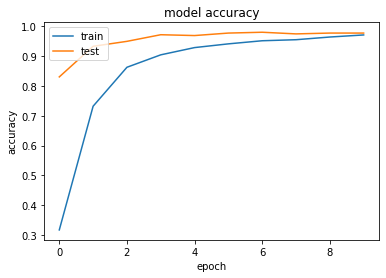

In [89]:
# Plot the history
model.plot_history()

In [90]:
#Evaluate the model
model.evaluate_model()

12/12 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9778
Test loss: 0.05921664088964462
Test accuracy: 0.9777777791023254


In [91]:
# Predict the model
model.predict_model()

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  1 31  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]
Accuracy: 0.9777777777777777


In [ ]:
# Save the model
model.model.save('digit_classifier.h5')

In [ ]:
def split_data(x, y, ratio):
    '''Splits the dataset according to the ratio given.
        Shuffles the data using random shuffling before splitting
        Converts the y labels as one hot vectors'''
    y=y[:,np.newaxis] #convert the labels to one hot vectors
    X=np.concatenate((x,y),axis=1) #concatenate the data and labels
    np.random.shuffle(X) #shuffle the data
    train_size = int(np.shape(X)[0] * ratio) #get the training size
    y_train = np.zeros((train_size,2)) #create the training labels
    y_test = np.zeros((X.shape[0]-train_size, 2)) #create the testing labels
    y1=X[:train_size,-1]
    y2=X[train_size:,-1]
    y_train[y1==0,0]=1
    y_train[y1==1,1]=1
    y_test[y2==0,0]=1
    y_test[y2==1,1]=1
    return X[:train_size,:-1], y_train, X[train_size:,:-1 ], y_test